<a href="https://colab.research.google.com/github/DanielBossio/MIAR-VIU/blob/main/AlgoritmosOptimizaci%C3%B3n/Trabajo_Pr%C3%A1ctico_Algoritmos_Daniel_Bossio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: xxxxxxx xxxxxxxxxxx xxxxxxxxxx  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---/tree/master/TrabajoPractico<br>
Google Colab: Configuración de Tribunales

Descripción del problema:

....

Se precisa configurar tribunales de evaluación para un grupo de 15 alumnos que desean presentar su Trabajo Fin de Máster (TFM). Hay 15 alumnos, por lo que se deben configurar 15 tribunales buscando la configuración más equilibrada posible en cuanto a la cantidad de tribunales asignados a cada profesor, es decir, evitando que un profesor tenga muchos tribunales y otros pocos. Ningún profesor puede asistir a dos tribunales a la misma fecha/hora y no puede ser convocado a un tribunal al que no tiene disponibilidad. Cada tribunal está compuesto por tres profesores, cada uno desempeñando uno de los siguientes roles: Presidente, Secretario o Vocal. Los profesores han indicado su disponibilidad horaria para participar en los tribunales de 15h a 21h durante la semana del 15 al 19 de abril:
* Número de profesores : 10
* Número de tribunales : 15

#### Disponibilidad de los profesores
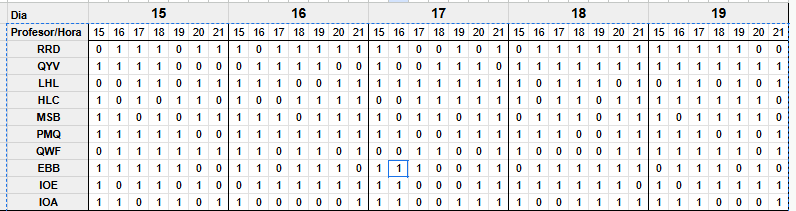

In [18]:
docentes = ["RDD", "QYV", "LHL", "HCL", "MSB", "PMQ", "QWF", "EBB", "IOE", "IOA"]

In [19]:
disponibilidades = {
    "RDD" : [2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 19, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
    "QYV" : [1, 2, 3, 4, 9, 10, 11, 12, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
    "LHL" : [3, 4, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 30, 31, 33, 35],
    "HCL" : [1, 3, 5, 6, 8, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34],
    "MSB" : [1, 2, 4, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 27, 28, 29, 31, 32, 33, 34],
    "PMQ" : [1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, 30, 31, 33, 35],
    "QWF" : [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 17, 18, 21, 22, 27, 28, 29, 30, 31, 32, 33, 35],
    "EBB" : [1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 16, 17, 20, 21, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34],
    "IOE" : [1, 3, 4, 6, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 33, 34, 35],
    "IOA" : [1, 2, 4, 5, 7, 8, 14, 15, 16, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 35]
}

#### Roles que cada profesor puede desempeñar
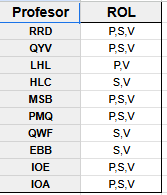

In [20]:
# Haciendo P = 1, S = 2, V = 3

roles = {
   "RDD" : ["presidente", "secretario", "vocal"],
   "QYV" : ["presidente", "secretario", "vocal"],
   "LHL" : ["presidente", "secretario"],
   "HCL" : ["secretario", "vocal"],
   "MSB" : ["presidente", "secretario", "vocal"],
   "PMQ" : ["presidente", "secretario", "vocal"],
   "QWF" : ["secretario", "vocal"],
   "EBB" : ["secretario", "vocal"],
   "IOE" : ["presidente", "secretario", "vocal"],
   "IOA" : ["presidente", "secretario", "vocal"]
}

#Modelo
**¿Cómo represento el espacio de soluciones?**

El espacio de soluciones es una tupla de objetos $x_{c, h, r} \in {1,0}$: para cada posible rol en un comité de evaluación asignado o no a una hora de exposición, determinar si el profesor es asignado o no al rol.

Para simplicidad, las horas disponibles se codifican del 1 al 35, donde 1 es las 15:00 del 15 de abril, y 35 las 21:00 del 19 de abril; y los posibles roles se muestran de la misma forma.

Por tanto, cada solucion está conformada por una lista de 15 objetos pertenecientes a la clase Presentación, cada uno con:
* Hora (de 1 a 35).
* Presidente.
* Secretario.
* Vocal.
* Número (num), para rastreabilidad.

Las soluciones iniciales se generan de forma aleatoria.

Las soluciones se guardan en objetos de la clase Particula, donde cada una tiene, además de las 115 presentaciones, un número, el costo de la solución actual, y el costo y las presentaciones del mejor para dicha partícula.*texto en cursiva*

**¿Cual es la función objetivo? y ¿Cómo implemento las restricciones?**

La función objetivo, así como las restricciones, se implementan en la función de evaluación, que evaluará cada partícula para determinar si:
* La carga de trabajo está desbalanceada.
* Hay asignaciones inválidas según la disponibilidad de los docentes.
* Los profesores están repetidos en una misma presentación para diferentes roles.

#Análisis
**¿Que complejidad tiene el problema?**

*Explicar el orden de complejidad, y contabilizar el espacio de soluciones*

El problema corresponde a una Asignación Multi-Rol con restricciones, siendo estas los horarios disponibles, los roles que cada profesor puede ocupar, el hecho de que se debe evitar repetir profesores en un mismo comité, y el hecho de que se busca balancear las cargas laborales (la cantidad de asignaciones). Este es un caso de Asignación Combinatoria con Restricciones (con las variantes mencionadas), los cuales están demostrados de ser de complejidad NP-Hard.

En general, dada la combinación de 15 comités, 3 roles por comité, 10 profesores, y 35 horas a asignar, las soluciones posibles (válidas o no) son $15 * 3 * 10 * 35 = 15750$. Ahora bien, evaluar la factibilidad de una asignación se puede hacer en tiempo polinomial (siendo n la cantidad de presentaciones, se realizan comprobaciones en un orden de O(n)). Sin embargo, evaluar la mejor combinación de profesores, roles y horas requiere una exploración exhaustiva del espacio de soluciones, que crece exponencialmente con el número de exposiciones y profesores.

#Diseño
**¿Que técnica utilizo? ¿Por qué?**

Para este problema se utilizó PSO (Particle Swarm Optimization), donde cada partícula es una posible solución: una asignación completa de profesores a comités, y de comités a horas. Para la fase de actualización, en cada iteración cada partícula realizará una serie de cambios aleatorios en base a su distancia a la mejor combinación para dicha partícula y al mejor global. Los cambios implementados son:
* Cambiar uno de los profesores de una presentación, dando prioridad a si hay alguno repetido.
* Intercambia profesores entre dos presentaciones, manteniendo sus roles.
* Mover un profesor de un comité a otro, manteniendo el rol. De igual forma, se priorizan los profesores repetidos en una asignación.
* Cambiar la hora de una presentación, sin mover los profesores. Solo se hace si hay coincidencia de disponibilidades y si la hora no entra en conflicto con otras presentaciones.
* Cambiar el rol de dos profesores en un comité. Solo se hace si no hay conflictos entre los posibles roles.

# Implementación de PSO

## Clases Presentacion y Particula

In [21]:
# Genera una asignación de comité a una hora
def generar_solucion(disponibilidades, roles):
    hora = np.random.randint(1, 46)
    reps = 0
    presidente = docentes[np.random.randint(0, 10)]
    secretario = docentes[np.random.randint(0, 10)]
    vocal = docentes[np.random.randint(0, 10)]
    return [hora, presidente, secretario, vocal]

In [22]:
class Presentacion:
    def __init__(self, num):
        # Inicialización de la asignación
        self.num = num
        self.hora, self.presidente, self.secretario, self.vocal = generar_solucion(disponibilidades, roles)

    def __str__(self):
        return f"Presentacion {self.num}: \nHora: {self.hora} \nPresidente: {self.presidente} \nSecretario: {self.secretario} \nVocal: {self.vocal}"

class Particula:
    def __init__(self, num):
        # Inicialización de la partícula
        # Se inicializan 15 asignaciones
        self.num = num
        self.presentaciones = []
        for i in range(15):
            self.presentaciones.append(Presentacion(i))
        self.best = self.presentaciones
        self.costo = evaluar_soluciones(self.presentaciones)
        self.pbest = self.costo
        print("Costo de la particula", self.num, ":", self.costo)


## Función de evaluación

In [23]:
def evaluar_soluciones(presentaciones):
    # Evaluar la solución actual
    # Costo/penalización de la solución actual
    total = 0
    # Se guarda la cantidad de asignaciones de cada profesor para comparación
    cant_asignaciones = {}
    for profesor in docentes:
        cant_asignaciones[profesor] = 0

    for i in range(len(presentaciones)):
        # Contabilizar las asignaciones de cada profesor
        hora = presentaciones[i].hora
        cant_asignaciones[presentaciones[i].presidente] += 1
        cant_asignaciones[presentaciones[i].secretario] += 1
        cant_asignaciones[presentaciones[i].vocal] += 1

        # Penalizar asignaciones invalidas
        if hora not in disponibilidades[presentaciones[i].presidente] or "presidente" not in roles[presentaciones[i].presidente]:
            total += 50
        if hora not in disponibilidades[presentaciones[i].secretario] or "secretario" not in roles[presentaciones[i].secretario]:
            total += 50
        if hora not in disponibilidades[presentaciones[i].vocal] or "vocal" not in roles[presentaciones[i].vocal]:
            total += 50

        # Penalizar profesores repetidos en una misma presentación
        if any([presentaciones[i].presidente == presentaciones[i].secretario, presentaciones[i].presidente == presentaciones[i].vocal, presentaciones[i].secretario == presentaciones[i].vocal]):
            total += 100

    print(cant_asignaciones)
    # Penalizar desigualdades en cargas de trabajo
    cant_asignaciones = list(cant_asignaciones.values())
    cant_asignaciones.sort()
    for i in range(0, len(cant_asignaciones)//2):
        total += abs(cant_asignaciones[i] - cant_asignaciones[len(cant_asignaciones)-1-i])*10
    return total

## Inicialización

In [24]:
import numpy as np

In [25]:
# Inicialización de partículas (10 en este caso)
particulas = []
for i in range(10):
    particulas.append(Particula(i))

{'RDD': 1, 'QYV': 4, 'LHL': 8, 'HCL': 4, 'MSB': 3, 'PMQ': 3, 'QWF': 8, 'EBB': 4, 'IOE': 4, 'IOA': 6}
Costo de la particula 0 : 1900
{'RDD': 7, 'QYV': 6, 'LHL': 5, 'HCL': 3, 'MSB': 3, 'PMQ': 3, 'QWF': 5, 'EBB': 5, 'IOE': 5, 'IOA': 3}
Costo de la particula 1 : 1610
{'RDD': 2, 'QYV': 10, 'LHL': 5, 'HCL': 9, 'MSB': 4, 'PMQ': 2, 'QWF': 4, 'EBB': 4, 'IOE': 3, 'IOA': 2}
Costo de la particula 2 : 1540
{'RDD': 3, 'QYV': 4, 'LHL': 2, 'HCL': 5, 'MSB': 12, 'PMQ': 4, 'QWF': 4, 'EBB': 1, 'IOE': 8, 'IOA': 2}
Costo de la particula 3 : 1360
{'RDD': 5, 'QYV': 6, 'LHL': 5, 'HCL': 3, 'MSB': 6, 'PMQ': 4, 'QWF': 3, 'EBB': 2, 'IOE': 7, 'IOA': 4}
Costo de la particula 4 : 1480
{'RDD': 3, 'QYV': 6, 'LHL': 3, 'HCL': 10, 'MSB': 4, 'PMQ': 2, 'QWF': 3, 'EBB': 5, 'IOE': 4, 'IOA': 5}
Costo de la particula 5 : 2400
{'RDD': 2, 'QYV': 5, 'LHL': 2, 'HCL': 9, 'MSB': 6, 'PMQ': 3, 'QWF': 7, 'EBB': 5, 'IOE': 5, 'IOA': 1}
Costo de la particula 6 : 1540
{'RDD': 4, 'QYV': 3, 'LHL': 5, 'HCL': 3, 'MSB': 6, 'PMQ': 4, 'QWF': 3, 'E

In [26]:
# Evaluar los costos de las partículas y almacenar el mejor costo global inicial
mejor_costo = float('inf')
mejor_particula = None
for i in range(len(particulas)):
    if particulas[i].costo < mejor_costo:
        mejor_costo = particulas[i].costo
        mejor_particula = particulas[i]

In [27]:
print("Mejor solución encontrada:", mejor_costo)
# Imprime la mejor solución encontrada
for presentacion in mejor_particula.presentaciones:
  print(presentacion)

Mejor solución encontrada: 1360
Presentacion 0: 
Hora: 45 
Presidente: MSB 
Secretario: IOA 
Vocal: IOE
Presentacion 1: 
Hora: 32 
Presidente: MSB 
Secretario: MSB 
Vocal: IOE
Presentacion 2: 
Hora: 16 
Presidente: IOE 
Secretario: HCL 
Vocal: PMQ
Presentacion 3: 
Hora: 9 
Presidente: RDD 
Secretario: MSB 
Vocal: MSB
Presentacion 4: 
Hora: 29 
Presidente: MSB 
Secretario: QYV 
Vocal: MSB
Presentacion 5: 
Hora: 31 
Presidente: QYV 
Secretario: QWF 
Vocal: IOA
Presentacion 6: 
Hora: 17 
Presidente: QWF 
Secretario: IOE 
Vocal: LHL
Presentacion 7: 
Hora: 20 
Presidente: QYV 
Secretario: MSB 
Vocal: HCL
Presentacion 8: 
Hora: 3 
Presidente: IOE 
Secretario: LHL 
Vocal: PMQ
Presentacion 9: 
Hora: 32 
Presidente: MSB 
Secretario: PMQ 
Vocal: IOE
Presentacion 10: 
Hora: 11 
Presidente: RDD 
Secretario: RDD 
Vocal: IOE
Presentacion 11: 
Hora: 6 
Presidente: EBB 
Secretario: MSB 
Vocal: MSB
Presentacion 12: 
Hora: 32 
Presidente: QYV 
Secretario: HCL 
Vocal: IOE
Presentacion 13: 
Hora: 21 
Pres

## Desarrollo del algoritmo

### Calcular velocidad
La velocidad está planteada como el número de cambios a realizar en una solución para acercarla al mejor global.

In [28]:
import random
import math

def calcular_velocidad(particula):
    # Implementa la cantidad de cambios a realizar la partícula
    # Basado en la posición actual, p_best y g_best
    p_actual = particula.costo
    p_best = particula.pbest
    g_best = mejor_costo
    cant_cambios = max(1, math.ceil(p_actual/p_best - p_actual/g_best) + 1)

    # Generar cambios aleatorios
    nueva_velocidad = []  # Lista de cambios a realizar en la solución
    for i in range(cant_cambios):
        cambio = random.choice([
            "cambiar_profesor_rol",  # Cambiar el rol de un profesor en una presentación
            "intercambiar_profesores", # Intercambiar profesores entre presentaciones
            "cambiar_profesor_comite", # Cambiar al profesor de comité, manteniendo su rol
            "cambiar_hora", # Cambiar la hora de la presentación
            "cambiar_roles", # Cambiar el rol de dos profesores en un comité
        ])
        nueva_velocidad.append((i, cambio))

    return nueva_velocidad

### Cambiar rol de un profesor

In [29]:
def cambiar_profesor_rol(presentacion, docentes, roles, disponibilidades):
  """Cambiar un profesor en una presentación."""

  # Se comprueba si alguno de los profesores está repetido
  # Si no, se elige aleatoriamente
  if presentacion.presidente == presentacion.secretario or presentacion.presidente == presentacion.vocal:
    profesor_a_cambiar = "presidente"
  elif presentacion.secretario == presentacion.vocal:
    profesor_a_cambiar = random.choice(["secretario", "vocal"])
  else:
    profesor_a_cambiar = random.choice(["presidente", "secretario", "vocal"])
  profesor_actual = getattr(presentacion, profesor_a_cambiar)

  posibles_roles = roles[profesor_actual]
  if len(posibles_roles) <=1:
    return presentacion
  nuevo_rol = random.choice([rol for rol in posibles_roles if rol != profesor_a_cambiar])

  #Buscar un profesor disponible
  reps = 0
  while True:
      nuevo_profesor = random.choice(docentes)
      if (presentacion.hora in disponibilidades[nuevo_profesor] and nuevo_rol in roles[nuevo_profesor] and nuevo_profesor not in [getattr(presentacion, rol) for rol in ["presidente", "secretario", "vocal"]]) or reps == 10:
          setattr(presentacion, profesor_a_cambiar, nuevo_profesor)
          break
      else:
          reps += 1
  if reps == 10:
    return presentacion

  setattr(presentacion, profesor_a_cambiar, nuevo_profesor)
  return presentacion

### Intercambiar dos profesores

In [30]:
def intercambiar_profesores(presentacion1, presentacion2, docentes, roles, disponibilidades):
    """Intercambia profesores entre dos presentaciones, manteniendo sus roles."""

    rol_a_intercambiar = random.choice(["presidente", "secretario", "vocal"])

    profesor1 = getattr(presentacion1, rol_a_intercambiar)
    profesor2 = getattr(presentacion2, rol_a_intercambiar)

    # Verificar si el intercambio es válido
    if (presentacion1.hora in disponibilidades[profesor2] and getattr(presentacion2, rol_a_intercambiar) in roles[profesor2] and
        presentacion2.hora in disponibilidades[profesor1] and getattr(presentacion1, rol_a_intercambiar) in roles[profesor1]):
        setattr(presentacion1, rol_a_intercambiar, profesor2)
        setattr(presentacion2, rol_a_intercambiar, profesor1)
        return presentacion1, presentacion2
    else:
        return presentacion1, presentacion2

### Mover un profesor entre comités

In [31]:
def cambiar_profesor_comite(presentacion1, presentacion2, docentes, roles, disponibilidades):
    """Cambia al profesor de un comité, manteniendo su rol."""

    # Se comprueba si alguno de los profesores está repetido
    # Si no, se elige aleatoriamente
    if presentacion1.presidente == presentacion1.secretario or presentacion1.presidente == presentacion1.vocal:
        rol_a_cambiar = "presidente"
    elif presentacion1.secretario == presentacion1.vocal:
        rol_a_cambiar = random.choice(["secretario", "vocal"])
    else:
        rol_a_cambiar = random.choice(["presidente", "secretario", "vocal"])
    profesor_actual = getattr(presentacion1, rol_a_cambiar)
    if profesor_actual in [getattr(presentacion2, rol) for rol in ["presidente", "secretario", "vocal"]]:
        return presentacion1, presentacion2

    #Buscar un profesor disponible con el mismo rol
    reps = 0
    while True:
        nuevo_profesor = random.choice(docentes)
        if (presentacion1.hora in disponibilidades[nuevo_profesor] and rol_a_cambiar in roles[nuevo_profesor] and nuevo_profesor not in [getattr(presentacion1, rol) for rol in ["presidente", "secretario", "vocal"] if rol != rol_a_cambiar]) or reps == 10:
            setattr(presentacion1, rol_a_cambiar, nuevo_profesor)
            setattr(presentacion2, rol_a_cambiar, profesor_actual)
            break
        else:
            reps += 1
    if reps == 10:
        return presentacion1, presentacion2

    setattr(presentacion, rol_a_cambiar, nuevo_profesor)
    return presentacion1, presentacion2

### Cambiar hora

In [32]:
def cambiar_hora(presentacion, horas, docentes, roles, disponibilidades):
    """Cambia la hora de una presentación."""

    nueva_hora = np.random.randint(1, 46)

    # Verificar si la nueva hora es válida para todos los profesores de la presentación
    if (nueva_hora in disponibilidades[presentacion.presidente] and "presidente" in roles[presentacion.presidente] and
        nueva_hora in disponibilidades[presentacion.secretario] and "secretario" in roles[presentacion.secretario] and
        nueva_hora in disponibilidades[presentacion.vocal] and "vocal" in roles[presentacion.vocal] and
        nueva_hora not in horas):
        presentacion.hora = nueva_hora
        return presentacion
    else:
        return presentacion

### Cambiar roles

In [33]:
def cambiar_roles(presentacion, docentes, roles, disponibilidades):
    """Cambia el rol de dos profesores en un comité."""

    # Elige aleatoriamente los dos roles a cambiar, comprobando que no sean iguales
    rol1 = random.choice(["presidente", "secretario", "vocal"])
    rol2 = random.choice(["presidente", "secretario", "vocal"])

    while rol1 == rol2:
        rol2 = random.choice(["presidente", "secretario", "vocal"])

    profesor1 = getattr(presentacion, rol1)
    profesor2 = getattr(presentacion, rol2)

    # Verificar si el intercambio de roles es válido
    if (presentacion.hora in disponibilidades[profesor1] and rol2 in roles[profesor1] and profesor1 not in [getattr(presentacion, rol) for rol in ["presidente", "secretario", "vocal"] if rol != rol1] and
        presentacion.hora in disponibilidades[profesor2] and rol1 in roles[profesor2] and profesor2 not in [getattr(presentacion, rol) for rol in ["presidente", "secretario", "vocal"] if rol != rol2]):
        setattr(presentacion, rol1, profesor2)
        setattr(presentacion, rol2, profesor1)
        return presentacion
    else:
        rol2 = [rol for rol in ["presidente", "secretario", "vocal"] if rol not in [rol1, rol2]][0]
        profesor2 = getattr(presentacion, rol2)
        if (presentacion.hora in disponibilidades[profesor1] and rol2 in roles[profesor1] and profesor1 not in [getattr(presentacion, rol) for rol in ["presidente", "secretario", "vocal"] if rol != rol1] and
            presentacion.hora in disponibilidades[profesor2] and rol1 in roles[profesor2] and profesor2 not in [getattr(presentacion, rol) for rol in ["presidente", "secretario", "vocal"] if rol != rol2]):
            setattr(presentacion, rol1, profesor2)
            setattr(presentacion, rol2, profesor1)
        return presentacion

### Algoritmo principal

In [34]:
import copy

# Algoritmo PSO
# 5000 iteraciones
for iteracion in range(5000):
    for particula in particulas:
        # Se calcula la velocidad de la partícula (cambios a hacer)
        velocidad = calcular_velocidad(particula)
        for v in velocidad:
          # Realizar los cambios determinados
          if v[1] == "cambiar_profesor_rol":
              idx = random.randint(0, len(particula.presentaciones)-1)
              particula.presentaciones[idx] = cambiar_profesor_rol(
                  particula.presentaciones[idx], docentes, roles, disponibilidades
              )
          elif v[1] == "intercambiar_profesores":
              idx1 = random.randint(0, len(particula.presentaciones)-1)
              idx2 = random.randint(0, len(particula.presentaciones)-1)
              while idx1 == idx2:
                  idx2 = random.randint(0, len(particula.presentaciones)-1)

              particula.presentaciones[idx1], particula.presentaciones[idx2] = intercambiar_profesores(
                  particula.presentaciones[idx1], particula.presentaciones[idx2], docentes, roles, disponibilidades
              )
          elif v[1] == "cambiar_profesor_comite":
              idx1 = random.randint(0, len(particula.presentaciones)-1)
              idx2 = random.randint(0, len(particula.presentaciones)-1)
              while idx1 == idx2:
                  idx2 = random.randint(0, len(particula.presentaciones)-1)

              particula.presentaciones[idx1], particula.presentaciones[idx2] = cambiar_profesor_comite(
                  particula.presentaciones[idx1], particula.presentaciones[idx2], docentes, roles, disponibilidades
              )
          elif v[1] == "cambiar_hora":
              horas = [presentacion.hora for presentacion in particula.presentaciones]

              idx = random.randint(0, len(particula.presentaciones)-1)
              particula.presentaciones[idx] = cambiar_hora(
                  particula.presentaciones[idx], horas, docentes, roles, disponibilidades
              )
          elif v[1] == "cambiar_roles":
              idx = random.randint(0, len(particula.presentaciones)-1)
              particula.presentaciones[idx] = cambiar_roles(
                  particula.presentaciones[idx], docentes, roles, disponibilidades
              )

        # Actualizar el costo de la partícula
        nuevo_costo = evaluar_soluciones(particula.presentaciones)
        particula.costo = nuevo_costo

        # Comparar la asignación actual contra los óptimos locales y globales
        if nuevo_costo < particula.pbest:
            particula.pbest = nuevo_costo
            particula.best = particula.presentaciones  # Actualizar la mejor posición personal

        if nuevo_costo < mejor_costo:
            mejor_costo = nuevo_costo
            mejor_particula = copy.deepcopy(particula)  # Actualizar la mejor posición global


Se truncaron las últimas líneas 5000 del resultado de transmisión.
{'RDD': 5, 'QYV': 5, 'LHL': 6, 'HCL': 5, 'MSB': 6, 'PMQ': 4, 'QWF': 5, 'EBB': 1, 'IOE': 3, 'IOA': 5}
{'RDD': 6, 'QYV': 5, 'LHL': 4, 'HCL': 2, 'MSB': 7, 'PMQ': 5, 'QWF': 1, 'EBB': 5, 'IOE': 5, 'IOA': 5}
{'RDD': 5, 'QYV': 8, 'LHL': 4, 'HCL': 2, 'MSB': 2, 'PMQ': 7, 'QWF': 2, 'EBB': 2, 'IOE': 7, 'IOA': 6}
{'RDD': 9, 'QYV': 5, 'LHL': 1, 'HCL': 2, 'MSB': 7, 'PMQ': 5, 'QWF': 3, 'EBB': 3, 'IOE': 5, 'IOA': 5}
{'RDD': 5, 'QYV': 6, 'LHL': 4, 'HCL': 4, 'MSB': 5, 'PMQ': 6, 'QWF': 2, 'EBB': 3, 'IOE': 6, 'IOA': 4}
{'RDD': 5, 'QYV': 4, 'LHL': 3, 'HCL': 5, 'MSB': 5, 'PMQ': 8, 'QWF': 6, 'EBB': 3, 'IOE': 3, 'IOA': 3}
{'RDD': 2, 'QYV': 3, 'LHL': 3, 'HCL': 5, 'MSB': 8, 'PMQ': 6, 'QWF': 6, 'EBB': 4, 'IOE': 6, 'IOA': 2}
{'RDD': 4, 'QYV': 4, 'LHL': 5, 'HCL': 4, 'MSB': 8, 'PMQ': 7, 'QWF': 0, 'EBB': 7, 'IOE': 2, 'IOA': 4}
{'RDD': 4, 'QYV': 9, 'LHL': 3, 'HCL': 4, 'MSB': 7, 'PMQ': 4, 'QWF': 4, 'EBB': 6, 'IOE': 2, 'IOA': 2}
{'RDD': 4, 'QYV': 6, 'LH

In [35]:
print("Mejor solución encontrada:", evaluar_soluciones(mejor_particula.best))
# Imprime la mejor solución encontrada
for presentacion in mejor_particula.best:
  print(presentacion)

{'RDD': 4, 'QYV': 6, 'LHL': 5, 'HCL': 5, 'MSB': 5, 'PMQ': 5, 'QWF': 2, 'EBB': 3, 'IOE': 6, 'IOA': 4}
Mejor solución encontrada: 90
Presentacion 0: 
Hora: 22 
Presidente: IOA 
Secretario: LHL 
Vocal: PMQ
Presentacion 1: 
Hora: 19 
Presidente: QYV 
Secretario: HCL 
Vocal: RDD
Presentacion 2: 
Hora: 21 
Presidente: LHL 
Secretario: HCL 
Vocal: IOA
Presentacion 3: 
Hora: 25 
Presidente: LHL 
Secretario: MSB 
Vocal: QYV
Presentacion 4: 
Hora: 20 
Presidente: LHL 
Secretario: EBB 
Vocal: MSB
Presentacion 5: 
Hora: 32 
Presidente: RDD 
Secretario: MSB 
Vocal: EBB
Presentacion 6: 
Hora: 27 
Presidente: IOE 
Secretario: HCL 
Vocal: EBB
Presentacion 7: 
Hora: 24 
Presidente: IOE 
Secretario: RDD 
Vocal: PMQ
Presentacion 8: 
Hora: 35 
Presidente: QYV 
Secretario: IOE 
Vocal: IOA
Presentacion 9: 
Hora: 31 
Presidente: IOE 
Secretario: QYV 
Vocal: MSB
Presentacion 10: 
Hora: 12 
Presidente: IOE 
Secretario: HCL 
Vocal: QYV
Presentacion 11: 
Hora: 13 
Presidente: RDD 
Secretario: PMQ 
Vocal: IOE
Pre

In [36]:
evaluar_soluciones(mejor_particula.best)

{'RDD': 4, 'QYV': 6, 'LHL': 5, 'HCL': 5, 'MSB': 5, 'PMQ': 5, 'QWF': 2, 'EBB': 3, 'IOE': 6, 'IOA': 4}


90

In [38]:
mejor_costo

90

### Mapeo de la mejor solución a los valores conocidos

In [39]:
dias = [15, 16, 17, 18, 19]
for presentacion in mejor_particula.best:
  dia = f"{dias[(presentacion.hora-1)//7]} de abril"
  hora = f"{(presentacion.hora)%7 + 15}:00"
  print(f"Presentación {presentacion.num}: {dia}, {hora} \nPresidente: {presentacion.presidente} \nSecretario: {presentacion.secretario} \nVocal: {presentacion.vocal}\n")

Presentación 0: 18 de abril, 16:00 
Presidente: IOA 
Secretario: LHL 
Vocal: PMQ

Presentación 1: 17 de abril, 20:00 
Presidente: QYV 
Secretario: HCL 
Vocal: RDD

Presentación 2: 17 de abril, 15:00 
Presidente: LHL 
Secretario: HCL 
Vocal: IOA

Presentación 3: 18 de abril, 19:00 
Presidente: LHL 
Secretario: MSB 
Vocal: QYV

Presentación 4: 17 de abril, 21:00 
Presidente: LHL 
Secretario: EBB 
Vocal: MSB

Presentación 5: 19 de abril, 19:00 
Presidente: RDD 
Secretario: MSB 
Vocal: EBB

Presentación 6: 18 de abril, 21:00 
Presidente: IOE 
Secretario: HCL 
Vocal: EBB

Presentación 7: 18 de abril, 18:00 
Presidente: IOE 
Secretario: RDD 
Vocal: PMQ

Presentación 8: 19 de abril, 15:00 
Presidente: QYV 
Secretario: IOE 
Vocal: IOA

Presentación 9: 19 de abril, 18:00 
Presidente: IOE 
Secretario: QYV 
Vocal: MSB

Presentación 10: 16 de abril, 20:00 
Presidente: IOE 
Secretario: HCL 
Vocal: QYV

Presentación 11: 16 de abril, 21:00 
Presidente: RDD 
Secretario: PMQ 
Vocal: IOE

Presentación 1